In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as m

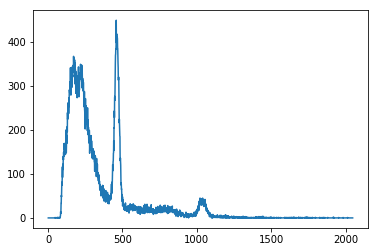

In [2]:
data = pd.read_table("result/Na.csv", header=5)
x = np.array(data["Channel"])
y = np.array(data["Counts"])
plt.plot(x, y)

In [7]:
def fiter(x, pa, pb, pc, la, lb):
    return pa*x*x + pb*x + pc + la*x + lb

def line(x, la, lb):
    return la * x + lb

def x_max_parabola(pa, pb, pc):
    return -pb / (2 * pa)

def x_parabola(pa, pb, pc):
    D = pb**2 - 4*pa*pc
    if D < 0:
        return []
    elif D == 0:
        return -pb / (2 * pa)
    else:
        x1 = (-pb - D**0.5) / 2*pa
        x2 = (-pb + D**0.5) / 2*pa
        return [x1, x2]
    
def x_max_fiter(pa, pb, pc, la, lb):
    return -(pb + la) / (2 * pa)


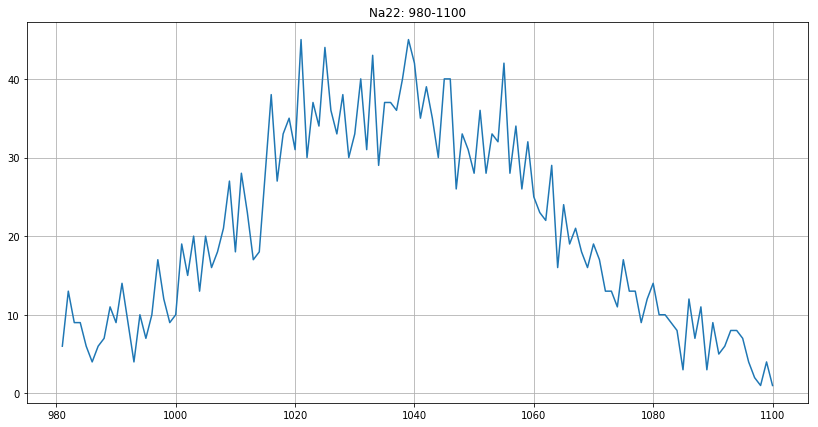

In [8]:
start, stop = 980, 1100
plt.figure(figsize=(14,7))
plt.title("Na22: " + str(start) + "-" + str(stop))
plt.grid()
plt.plot(x[start:stop], y[start:stop])

In [9]:
xd, yd = x[start:stop], y[start:stop]
result = curve_fit(f = fiter, xdata = xd, ydata = yd)
popt, pcov = result
print(popt)

[-1.00823804e-02  7.26934939e+04 -1.31872913e+07 -7.26725643e+04
  1.31764626e+07]


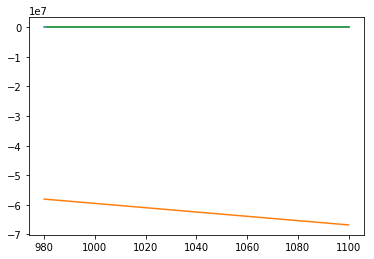

In [10]:
pa, pb, pc, la, lb = popt
xp = np.linspace(980, 1100, 100)
yp = fiter(xp, pa, pb, pc, la, lb)
yl = line(xp, la, lb)
plt.plot(xp, yp)
plt.plot(xp, yl)
plt.plot(x[start:stop], y[start:stop])